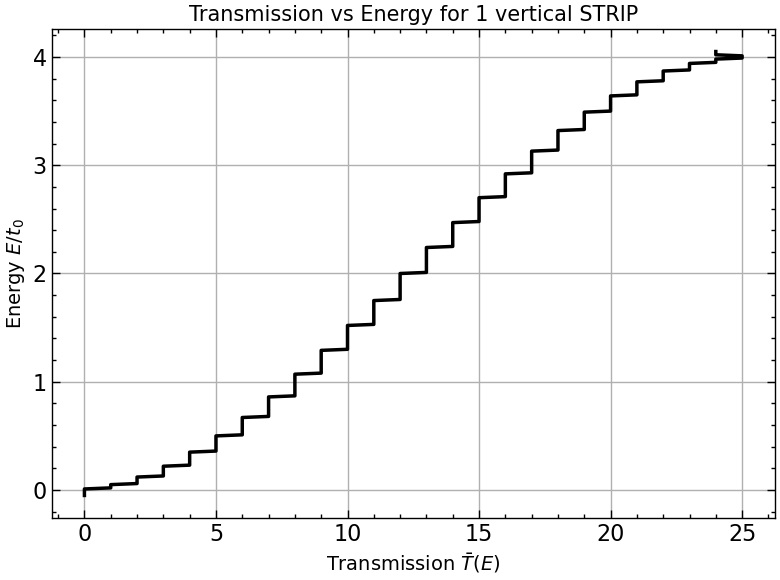

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science' , 'notebook'])

# === Parameters ===
t0 = 1.0           # Hopping energy
a = 2.5e-9         # Lattice constant (not directly used, for units)
NW = 25            # Width of the 2D system
Np = 1             # Length in longitudinal direction (short constriction)
zplus = 1j * 1e-12
EE_list = np.arange(-0.05, 4.05 + 0.01, 0.01) * t0

q = 1.6e-19
hbar = 1.06e-34
qh = q / hbar
B = 0

# Construct alpha and beta matrices
al = 4 * t0
by = -t0 * np.eye(NW, k=1) + -t0 * np.eye(NW, k=-1)
alpha_base = np.eye(NW) * al + by
alpha_base += np.diag(np.arange(1, NW + 1) * 0.00)  # optional gradient
alpha_base += np.diag(np.concatenate([np.zeros(8), 0 * np.ones(9), np.zeros(8)]))  # potential bump

beta = np.diag(np.exp(1j * qh * B * a * a * np.arange(1, NW + 1))) * -t0

# Full Hamiltonian
H = np.kron(np.eye(Np), alpha_base)
if Np > 1:
    H += np.kron(np.eye(Np - 1, k=1), beta)
    H += np.kron(np.eye(Np - 1, k=-1), beta.T)

L = np.zeros((Np, Np))
R = np.zeros((Np, Np))
L[0, 0] = 1
R[-1, -1] = 1

Tcoh = []
E_vals = []

for EE in EE_list:
    ig0 = (EE + zplus) * np.eye(NW) - alpha_base
    gs1 = np.linalg.inv(ig0)
    change = 1
    while change > 1e-6:
        Gs = np.linalg.inv(ig0 - beta.T @ gs1 @ beta)
        change = np.sum(np.abs(Gs - gs1)) / np.sum(np.abs(gs1) + np.abs(Gs))
        gs1 = 0.5 * (Gs + gs1)
    Sigma1 = beta.T @ gs1 @ beta
    Sigma1 = np.kron(L, Sigma1)
    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)

    gs2 = np.linalg.inv(ig0)
    change = 1
    while change > 1e-6:
        Gs = np.linalg.inv(ig0 - beta @ gs2 @ beta.T)
        change = np.sum(np.abs(Gs - gs2)) / np.sum(np.abs(gs2) + np.abs(Gs))
        gs2 = 0.5 * (Gs + gs2)
    Sigma2 = beta @ gs2 @ beta.T
    Sigma2 = np.kron(R, Sigma2)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    G = np.linalg.inv((EE * np.eye(Np * NW)) - H - Sigma1 - Sigma2)
    T = np.real(np.trace(Gamma1 @ G @ Gamma2 @ G.conj().T))
    Tcoh.append(T)
    E_vals.append(EE / t0)

# === Plotting ===
plt.figure(figsize=(8, 6))
plt.plot(Tcoh, E_vals, 'k', linewidth=2.5)
plt.xlabel(r"Transmission $\bar{T}(E)$", fontsize=14)
plt.ylabel(r"Energy $E/t_0$", fontsize=14)
plt.title("Transmission vs Energy for 1 vertical STRIP", fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()


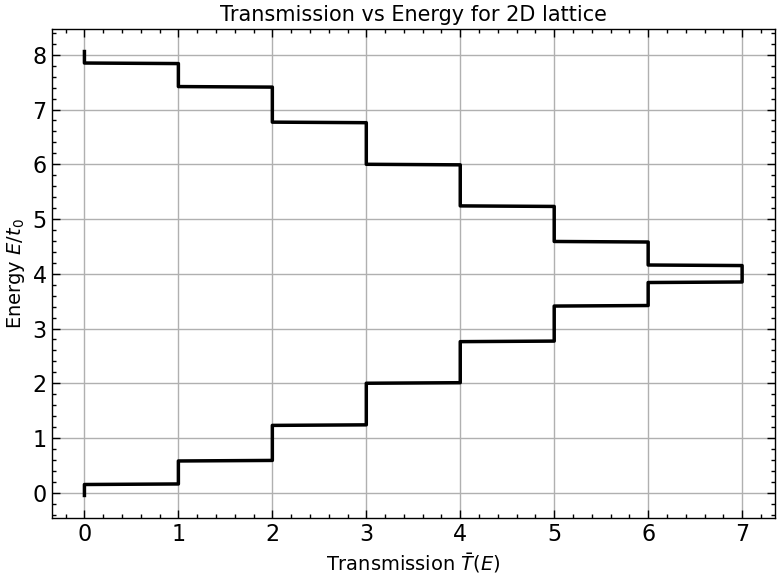

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science' , 'notebook'])

# === Parameters ===
t0 = 1.0           # Hopping energy
a = 2.5e-9         # Lattice constant (not directly used, for units)
NW = 7             # Width of the 2D system
Np = 7             # Length in longitudinal direction (short constriction)
zplus = 1j * 1e-12
EE_list = np.arange(-0.05, 8.05 + 0.01, 0.01) * t0

q = 1.6e-19
hbar = 1.06e-34
qh = q / hbar
B = 0

# Construct alpha and beta matrices
al = 4 * t0
by = -t0 * np.eye(NW, k=1) + -t0 * np.eye(NW, k=-1)
alpha_base = np.eye(NW) * al + by
alpha_base += np.diag(np.arange(1, NW + 1) * 0.00)  # optional gradient
# alpha_base += np.diag(np.concatenate([np.zeros(8), 0 * np.ones(9), np.zeros(8)]))  # potential bump

beta = np.diag(np.exp(1j * qh * B * a * a * np.arange(1, NW + 1))) * -t0


# Full Hamiltonian
H = np.kron(np.eye(Np), alpha_base).astype(complex)
if Np > 1:
    H += np.kron(np.eye(Np, k=1), beta)
    H += np.kron(np.eye(Np, k=-1), beta.T)


L = np.zeros((Np, Np))
R = np.zeros((Np, Np))
L[0, 0] = 1
R[-1, -1] = 1

Tcoh = []
E_vals = []

for EE in EE_list:
    ig0 = (EE + zplus) * np.eye(NW) - alpha_base
    gs1 = np.linalg.inv(ig0)
    change = 1
    while change > 1e-6:
        Gs = np.linalg.inv(ig0 - beta.T @ gs1 @ beta)
        change = np.sum(np.abs(Gs - gs1)) / np.sum(np.abs(gs1) + np.abs(Gs))
        gs1 = 0.5 * (Gs + gs1)
    Sigma1 = beta.T @ gs1 @ beta
    Sigma1 = np.kron(L, Sigma1)
    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)

    gs2 = np.linalg.inv(ig0)
    change = 1
    while change > 1e-6:
        Gs = np.linalg.inv(ig0 - beta @ gs2 @ beta.T)
        change = np.sum(np.abs(Gs - gs2)) / np.sum(np.abs(gs2) + np.abs(Gs))
        gs2 = 0.5 * (Gs + gs2)
    Sigma2 = beta @ gs2 @ beta.T
    Sigma2 = np.kron(R, Sigma2)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    G = np.linalg.inv((EE * np.eye(Np * NW)) - H - Sigma1 - Sigma2)
    T = np.real(np.trace(Gamma1 @ G @ Gamma2 @ G.conj().T))
    Tcoh.append(T)
    E_vals.append(EE / t0)

# === Plotting ===
plt.figure(figsize=(8, 6))
plt.plot(Tcoh, E_vals, 'k', linewidth=2.5)
plt.xlabel(r"Transmission $\bar{T}(E)$", fontsize=14)
plt.ylabel(r"Energy $E/t_0$", fontsize=14)
plt.title("Transmission vs Energy for 2D lattice", fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()


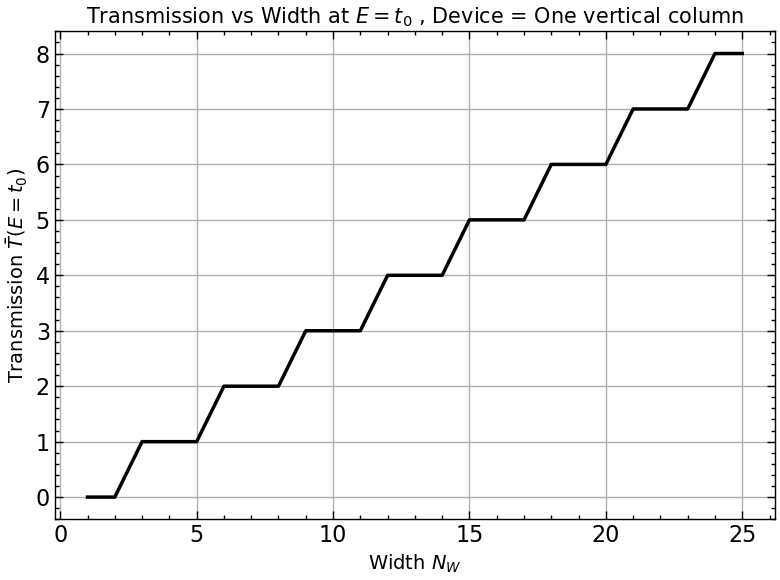

In [35]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook'])

# === Parameters ===
t0 = 1.0           # Hopping energy
a = 2.5e-9         # Lattice constant (not directly used here)
Np = 100            
zplus = 1j * 1e-12
EE = t0            # Fixed energy value for the sweep

q = 1.6e-19
hbar = 1.06e-34
qh = q / hbar
B = 0

NW_list = np.arange(1, 26)  # Widths from 1 to 25
Tcoh = []

for NW in NW_list:
    # Construct alpha and beta for this width
    al = 4 * t0
    by = -t0 * np.eye(NW, k=1) + -t0 * np.eye(NW, k=-1)
    alpha = np.eye(NW) * al + by
    
    # Optional central barrier potential (set V0 > 0 to add it)
    # V0 = 0.0
    # alpha += np.diag(np.concatenate([np.zeros(NW//3), V0 * np.ones(NW//3), np.zeros(NW - 2*(NW//3))]))

    beta = np.diag(np.exp(1j * qh * B * a * a * np.arange(1, NW + 1))) * -t0

    # Full device Hamiltonian (just one slice)
    H = alpha.copy()

    # Left and right lead selector matrices
    L = np.array([[1]])
    R = np.array([[1]])

    # Calculate left self-energy
    ig0 = (EE + zplus) * np.eye(NW) - alpha
    gs1 = np.linalg.inv(ig0)
    change = 1
    while change > 1e-6:
        Gs = np.linalg.inv(ig0 - beta.T @ gs1 @ beta)
        change = np.sum(np.abs(Gs - gs1)) / np.sum(np.abs(gs1) + np.abs(Gs))
        gs1 = 0.5 * (Gs + gs1)
    Sigma1 = beta.T @ gs1 @ beta
    Sigma1 = np.kron(L, Sigma1)
    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)

    # Calculate right self-energy
    gs2 = np.linalg.inv(ig0)
    change = 1
    while change > 1e-6:
        Gs = np.linalg.inv(ig0 - beta @ gs2 @ beta.T)
        change = np.sum(np.abs(Gs - gs2)) / np.sum(np.abs(gs2) + np.abs(Gs))
        gs2 = 0.5 * (Gs + gs2)
    Sigma2 = beta @ gs2 @ beta.T
    Sigma2 = np.kron(R, Sigma2)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    # Device Green's function
    G = np.linalg.inv((EE * np.eye(NW)) - H - Sigma1 - Sigma2)

    # Transmission via Landauer formula
    T = np.real(np.trace(Gamma1 @ G @ Gamma2 @ G.conj().T))
    Tcoh.append(T)

# === Plotting ===
plt.figure(figsize=(8, 6))
plt.plot(NW_list, Tcoh, 'k', linewidth=2.5)
plt.xlabel("Width $N_W$", fontsize=14)
plt.ylabel(r"Transmission $\bar{T}(E = t_0)$", fontsize=14)
plt.title("Transmission vs Width at $E = t_0$ , Device = One vertical column", fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()


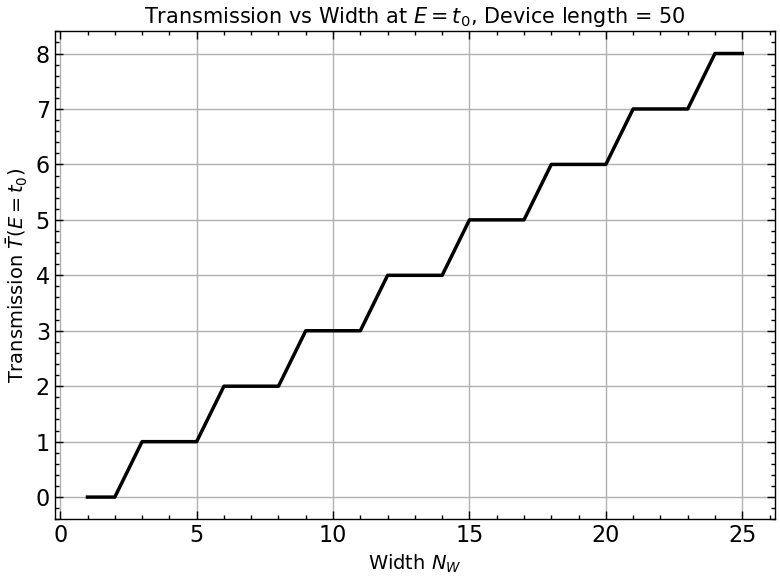

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook'])

# === Constants ===
t0 = 1.0
a = 2.5e-9
zplus = 1j * 1e-12
EE = t0
Np = 50  # device length (number of slices)

q = 1.6e-19
hbar = 1.06e-34
qh = q / hbar
B = 0  # you can sweep this too later

# Sweep over widths
NW_list = np.arange(1, 26)
Tcoh_list = []

for NW in NW_list:
    # --- Slice Hamiltonian alpha (Y hopping) ---
    alpha = np.eye(NW) * (4 * t0)
    for i in range(NW - 1):
        alpha[i, i+1] = alpha[i+1, i] = -t0

    # --- Coupling beta (X hopping with Peierls phase) ---
    phases = np.exp(1j * qh * B * a**2 * np.arange(1, NW+1))
    beta = np.diag(phases) * -t0

    # --- Full Hamiltonian (Np slices) ---
    Hdim = Np * NW
    H = np.kron(np.eye(Np, dtype=complex), alpha)
    H += np.kron(np.diag(np.ones(Np - 1), k=1), beta) + \
         np.kron(np.diag(np.ones(Np - 1), k=-1), beta.conj().T)


    # --- Self-energy for semi-infinite leads ---
    ig0 = (EE + zplus) * np.eye(NW) - alpha
    # Left lead
    gs1 = np.linalg.inv(ig0)
    while True:
        Gs = np.linalg.inv(ig0 - beta.conj().T @ gs1 @ beta)
        change = np.sum(np.abs(Gs - gs1)) / np.sum(np.abs(gs1) + np.abs(Gs))
        gs1 = 0.5 * (Gs + gs1)
        if change < 1e-6: break
    Sigma1 = np.kron(np.pad(gs1 @ beta @ beta.conj().T, ((0, Hdim - NW), (0, Hdim - NW))), np.eye(1))

    # Right lead
    gs2 = np.linalg.inv(ig0)
    while True:
        Gs = np.linalg.inv(ig0 - beta @ gs2 @ beta.conj().T)
        change = np.sum(np.abs(Gs - gs2)) / np.sum(np.abs(gs2) + np.abs(Gs))
        gs2 = 0.5 * (Gs + gs2)
        if change < 1e-6: break
    Sigma2 = np.kron(np.pad(gs2 @ beta @ beta.conj().T, ((Hdim - NW, 0), (Hdim - NW, 0))), np.eye(1))

    # --- Gamma matrices ---
    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    # --- Green's function and Transmission ---
    G = np.linalg.inv((EE * np.eye(Hdim, dtype=complex)) - H - Sigma1 - Sigma2)
    T = np.real(np.trace(Gamma1 @ G @ Gamma2 @ G.conj().T))
    Tcoh_list.append(T)

# === Plotting ===
plt.figure(figsize=(8, 6))
plt.plot(NW_list, Tcoh_list, 'k', linewidth=2.5)
plt.xlabel("Width $N_W$", fontsize=14)
plt.ylabel(r"Transmission $\bar{T}(E = t_0)$", fontsize=14)
plt.title(f"Transmission vs Width at $E = t_0$, Device length = {Np}", fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()
